<a href="https://colab.research.google.com/github/ziruiqiao/4806Lab/blob/main/Assignment_1_Zirui_Qiao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are visible without me having to run your colab notebook. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

import time
import sys
from sklearn.preprocessing import Normalizer
from torch import nn
from torch.autograd import Variable


**QUESTION 1**

In [6]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

YOUR ANSWER HERE
"""
x = -1
y = -2
z = 3
eq = 7*x^2*z - 2*x*y^3 + 5*z
gradient_x = 14*x*z - 2*y**3
gradient_y = -6*x*y**2
gradient_z = 7*x**2 + 5
print("(" + str(gradient_x) + ", " + str(gradient_y) + ", " + str(gradient_z) + ")")

(-26, 24, 12)


$$
f(x,y,z)=7x^2-2xy^3+5z\\
x=-1\quad y=-2\quad z=3\\
\begin{equation}
\begin{aligned}
\frac{\partial f}{\partial x} &=14xz-2y^3+0 =14(-1)(3)-2(-2)^3 =-26\\
\frac{\partial f}{\partial y} &=-6xy^2 =-6(-1)(-2)^2 =24\\
\frac{\partial f}{\partial z} &=7x^2+5 =7(-1)^2+5=12
\end{aligned}
\end{equation}
$$

This vector means that at point (-1, -2, 3), 
  
  1. the slope of this equation is -26 for x, 
  
  2. the slope of this equation is 24 for y,
  3. and slope is 12 for z. 

**QUESTION 2**

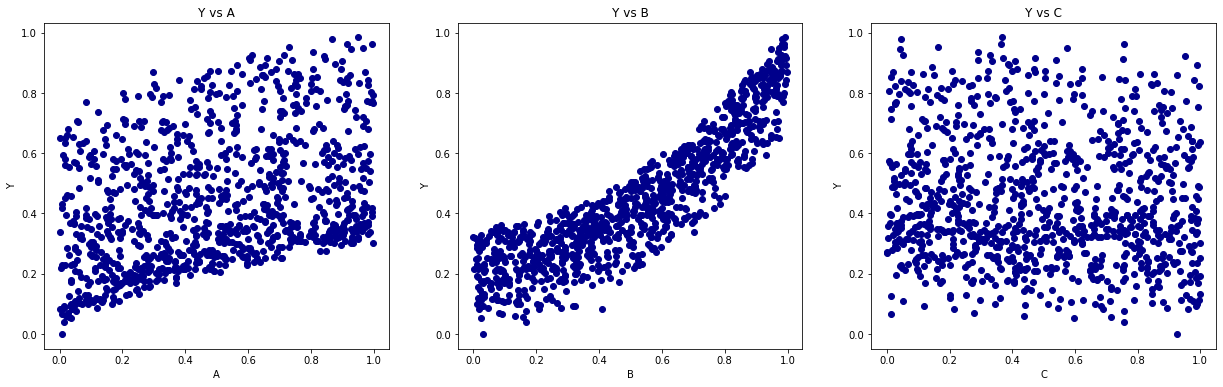

In [ ]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. 
Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.

YOUR CODE BELOW, IN THIS CELL
"""
# read data set
url = "https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/"
train = pd.read_csv(url + "train.csv")
test = pd.read_csv(url + "test.csv")
val = pd.read_csv(url + "val.csv")

# set the column headers
train_df = pd.DataFrame(train, columns=['A','B','C','Y','Label'])
test_df = pd.DataFrame(test, columns=['A','B','C','Y','Label'])
val_df = pd.DataFrame(val, columns=['A','B','C','Y','Label'])

#print(train_df.head()); print(test_df.head()); print(val_df.head())

# train data
train_set = train_df[['A','B',"C"]]
train_a = train_df['A']
train_b = train_df['B']
train_c = train_df['C']
train_y = train_df['Y']
train_note = train_df['Label']
train_note.rename('train_label')

# test data
test_set = test_df[['A','B',"C"]]
test_a = test_df['A']
test_b = test_df['B']
test_c = test_df['C']
test_y = test_df['Y']
test_note = test_df['Label']
test_note.rename('test_label')

# validation data
val_set = val_df[['A','B',"C"]]
val_a = val_df['A']
val_b = val_df['B']
val_c = val_df['C']
val_y = val_df['Y']
val_note = val_df['Label']
val_note.rename('val_label')

# draw data
plt.figure(figsize=(21,6))

plt.subplot(1,3,1); plt.scatter(train_a,train_y,c="DarkBlue"); plt.xlabel("A"); plt.ylabel("Y"); plt.title("Y vs A")
plt.subplot(1,3,2); plt.scatter(train_b,train_y,c="DarkBlue"); plt.xlabel("B"); plt.ylabel("Y"); plt.title("Y vs B")
plt.subplot(1,3,3); plt.scatter(train_c,train_y,c="DarkBlue"); plt.xlabel("C"); plt.ylabel("Y"); plt.title("Y vs C")
plt.show()

In [ ]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), 
how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

YOUR ANSWER HERE
"""

'\nQ2b: If you were using A, B, and C to predict Y (i.e., using linear regression), \nhow well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?\n\nYOUR ANSWER HERE\n'


I believe that C will do the worst, for the reason that no clear relationship between Y and C can be found in C-Y graph.

A will be better than C but still not that well. ALthough a trend of increase of Y can be found in A-Y Graph as A increases, it is hard to narrow the range of Y.

B will be the best among the three, since it not only shows a clear trend between Y and B, but also narrow the range of Y with a given B.


Nonlinear functions may fit the data better, but since we only have 1000 training data and lack of data will lead to overfit of non-linear data. Therefore, in this case nonlinear momdel will not fit the data better than linear model.

In [ ]:
"""
Q2c: The data is already normalized, how can you tell?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""
print(train_df.describe())
print(test_df.describe())
print(val_df.describe())

                 A            B            C            Y        Label
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.494402     0.508317     0.487465     0.444108     3.764000
std       0.287743     0.284111     0.292580     0.210157     2.183362
min       0.000100     0.000000     0.000108     0.000000     0.000000
25%       0.250918     0.275228     0.230890     0.287641     2.000000
50%       0.485486     0.515976     0.468818     0.395947     3.000000
75%       0.729613     0.747734     0.750513     0.589799     5.000000
max       0.998230     0.997099     0.999805     0.984138     9.000000
                 A            B            C            Y        Label
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.515573     0.492781     0.510463     0.435378     3.698000
std       0.290925     0.278679     0.289398     0.203455     2.118793
min       0.000000     0.000188     0.000000     0.004511     0.000000
25%   

We can see that the maximum and minimum of A,B,C,Y for all datasets are bounded in range [0, 1]. The data is already normalized

In [ ]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. 
Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.

YOUR CODE BELOW, IN THIS CELL
"""
# train data set square and sqrt
train_a_sqrt = train_a**(1/2)
train_b_sqrt = train_b**(1/2)
train_c_sqrt = train_c**(1/2)
train_a_square = train_a**2
train_b_square = train_b**2
train_c_square = train_c**2

train_set = train_set.assign(
    A_sqrt=train_a_sqrt,
    B_sqrt=train_b_sqrt,
    C_sqrt=train_c_sqrt,
    A_square=train_a_square,
    B_square=train_b_square,
    C_square=train_c_square
)
# test data set square and sqrt
test_a_sqrt = test_a**(1/2)
test_b_sqrt = test_b**(1/2)
test_c_sqrt = test_c**(1/2)
test_a_square = test_a**2
test_b_square = test_b**2
test_c_square = test_c**2

test_set = test_set.assign(
    A_sqrt=test_a_sqrt,
    B_sqrt=test_b_sqrt,
    C_sqrt=test_c_sqrt,
    A_square=test_a_square,
    B_square=test_b_square,
    C_square=test_c_square
)

# val data set square and sqrt
val_a_sqrt = val_a**(1/2)
val_b_sqrt = val_b**(1/2)
val_c_sqrt = val_c**(1/2)
val_a_square = val_a**2
val_b_square = val_b**2
val_c_square = val_c**2

val_set = val_set.assign(
    A_sqrt=val_a_sqrt,
    B_sqrt=val_b_sqrt,
    C_sqrt=val_c_sqrt,
    A_square=val_a_square,
    B_square=val_b_square,
    C_square=val_c_square
)

train_set_3 = train_set[['A','B','C']]
val_set_3 = val_set[['A','B','C']]
test_set_3 = test_set[['A','B','C']]

**QUESTION 3**

In [ ]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.

YOUR CODE BELOW, IN THIS CELL
"""
model_3 = LinearRegression().fit(train_set_3,train_y)

In [ ]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""
def match_model(data_name, input, output, model):
  # r_sq = model.score(input, output)
  # print(data_name, " coefficient of determination:", str(r_sq))
  predict = model.predict(input)
  mse = mean_squared_error(output,predict)
  mae = mean_absolute_error(output,predict)
  print(f"{data_name} mean absolute errors:        {mae}")
  print(f"{data_name} mean square errors:          {mse}")
  return mae

# train data
match_model("train data", train_set_3, train_y, model_3)
# validation
match_model("val data", val_set_3, val_y, model_3)
# test
match_model("test data", test_set_3, test_y, model_3)

train data mean absolute errors:        0.04297622772687733
train data mean square errors:          0.0026054727436227525
val data mean absolute errors:        0.042993924495539175
val data mean square errors:          0.0026322736221271424
test data mean absolute errors:        0.04199595732420805
test data mean square errors:          0.002560950200602679


0.04199595732420805

The model did not overfit the train set since the mean absolute errors for both validation dataset and test dataset are as small as test dataset 

In [ ]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""
print(f"bias: {model_3.intercept_}")
print(f"weights: {model_3.coef_}")

bias: 0.0030530675285197484
weights: [ 0.26851499  0.66435995 -0.06032162]


In [ ]:
"""
Q3d: Train another linear regression model using all 9 input features.

YOUR CODE BELOW, IN THIS CELL
"""
model_9 = LinearRegression().fit(train_set,train_y)

In [ ]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

YOUR CODE BELOW, IN THIS CELL
"""
# train data
match_model("train data", train_set, train_y, model_9)
# validation
match_model("val data", val_set, val_y, model_9)
# test
match_model("test data", test_set, test_y, model_9)

train data mean absolute errors:        2.6489755248107204e-05
train data mean square errors:          5.600555484958585e-09
val data mean absolute errors:        2.2842568580002835e-05
val data mean square errors:          9.791139397471014e-10
test data mean absolute errors:        2.606980306402873e-05
test data mean square errors:          1.551195777772603e-08


2.606980306402873e-05

In [ ]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""
print(f"bias: {model_9.intercept_}")
print(f"weights: {model_9.coef_}")

bias: 0.03170073560858788
weights: [ 3.18658118e-03  4.12904461e-04 -6.66706794e-02  3.29369858e-01
  5.77037044e-05  1.93867238e-04 -1.14337648e-03  6.63574154e-01
  1.43711935e-04]


In [ ]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

YOUR ANSWER HERE
"""

'\nQ3g: Which model performs better? How can you explain the difference in performance?\n\nYOUR ANSWER HERE\n'

The model with 9 inputs performs better.

model_3: model with 3 inputs

model_9: model with 9 inputs

Explaination:

model_3 is calculating the data in a 4-dimensional space, while model_9 is calculating in 10-dimensional space. Given more features make the model more sensitive to original inputs and thus increases model accuracy.

**QUESTION 4**

In [ ]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.

YOUR CODE BELOW, IN THIS CELL
"""
logistic_model_3 = LogisticRegression(solver='liblinear', random_state=0)
logistic_model_3.fit(train_set_3, train_note)
train_note.unique()

array([5, 3, 2, 4, 7, 1, 0, 6, 8, 9])

In [ ]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

YOUR CODE BELOW, IN THIS CELL
"""
def match_logistic(data_name, input, output, model):
  # r_sq = model.score(input, output)
  # print(data_name, " Coefficient of determination:", str(r_sq))
  predict = model.predict(input)
  mae = mean_absolute_error(output,predict)
  print(data_name, " mean absolute errors:", str(mae))
  a_s = accuracy_score(output,predict)
  print(data_name, " Accuracy:            ", str(a_s))
  return mae

match_logistic("Train Data", train_set_3, train_note, logistic_model_3)
match_logistic("Validation Data", val_set_3, val_note, logistic_model_3)
mae = match_logistic("Test Data", test_set_3, test_note, logistic_model_3)

Train Data  mean absolute errors: 0.88
Train Data  Accuracy:             0.406
Validation Data  mean absolute errors: 0.926
Validation Data  Accuracy:             0.351
Test Data  mean absolute errors: 0.945
Test Data  Accuracy:             0.359


In [ ]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.

YOUR CODE BELOW, IN THIS CELL
"""
logistic_model_9 = LogisticRegression(solver='liblinear', random_state=0)
logistic_model_9.fit(train_set, train_note)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
"""
Q4d: Repeat b, but with your new logistic regression model.

YOUR CODE BELOW, IN THIS CELL
"""
match_logistic("Train Data", train_set, train_note, logistic_model_9)
match_logistic("Validation Data", val_set, val_note, logistic_model_9)
match_logistic("Test Data", test_set, test_note, logistic_model_9)

Train Data  mean absolute errors: 0.685
Train Data  Accuracy:             0.469
Validation Data  mean absolute errors: 0.788
Validation Data  Accuracy:             0.389
Test Data  mean absolute errors: 0.763
Test Data  Accuracy:             0.417


0.763

In [ ]:
"""
Q4e: XGBoost is pre-installed on Google Colab. 
One hyper-parameter is the depth of the tree (called max_depth). 
Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y).

Hint: the test set should not be used to search for hyper-parameters. 
Train these models using only the 3 original features.

YOUR CODE BELOW, IN THIS CELL
"""
min = 1
index = 0
for i in range(1, 20):
  model = XGBClassifier(max_depth=i).fit(train_set_3,train_note)
  mae = match_logistic("Validation "+str(i)+" ", val_set_3, val_note, model)
  if min > mae:
    min = mae
    index = i
print(f"\nmin mean absolute errors:{min}")
print(f"index:{index}")

Validation 1   mean absolute errors: 0.491
Validation 1   Accuracy:             0.562
Validation 2   mean absolute errors: 0.317
Validation 2   Accuracy:             0.702
Validation 3   mean absolute errors: 0.22
Validation 3   Accuracy:             0.796
Validation 4   mean absolute errors: 0.193
Validation 4   Accuracy:             0.823
Validation 5   mean absolute errors: 0.199
Validation 5   Accuracy:             0.817
Validation 6   mean absolute errors: 0.19
Validation 6   Accuracy:             0.826
Validation 7   mean absolute errors: 0.189
Validation 7   Accuracy:             0.827
Validation 8   mean absolute errors: 0.184
Validation 8   Accuracy:             0.832
Validation 9   mean absolute errors: 0.195
Validation 9   Accuracy:             0.821
Validation 10   mean absolute errors: 0.183
Validation 10   Accuracy:             0.833
Validation 11   mean absolute errors: 0.183
Validation 11   Accuracy:             0.833
Validation 12   mean absolute errors: 0.185
Validati

In [ ]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

YOUR CODE BELOW, IN THIS CELL
"""
XG_model = XGBClassifier(max_depth=10).fit(train_set_3,train_note)
match_logistic("Validation", val_set_3, val_note, XG_model)
mae = match_logistic("Test", test_set_3, test_note, XG_model)

Validation  mean absolute errors: 0.183
Validation  Accuracy:             0.833
Test  mean absolute errors: 0.166
Test  Accuracy:             0.842


In [ ]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? 
Why do you think this is the case?

YOUR ANSWER HERE
"""

'\nQ4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? \nWhy do you think this is the case?\n\nYOUR ANSWER HERE\n'

Among the three, XGBoost model performs the best. XGBoost

**QUESTION 5**

In [ ]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, 
best suits our task? Explain briefly. 
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()

YOUR ANSWER HERE
"""

'\nQ5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.\nThis is a multi-class classification problem, which of the following loss functions, available in PyTorch, \nbest suits our task? Explain briefly. \ntorch.nn.CrossEntropyLoss()\ntorch.nn.MSELoss()\ntorch.nn.BCELoss()\n\nYOUR ANSWER HERE\n'

torch.nn.CrossEntropyLoss() is the best choice.

MSELoss: Mean Square Loss
BCELoss: Binary Cross Entropy

The goodness of a split is estimated by entropy. Therefore, for a classification problem, MSELoss is not a good choice. It is designed for regression problem.

There are 9 inputs in total, which is a multi-class classification problem. Therefore, Binary Cross Entropy is nor a good choice. It si designed for binomial problem.

Cross Entroy Loss is designed for multi-class classification.

Therefore, CrossEntropyLoss is the best choice.

In [ ]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits 
before applying your loss function (from a), or does the loss function compute the softmax for you?

YOUR ANSWER HERE
"""

'\nQ5b: Your model will output 10 numbers, one for each class.\nThese are called logits. Do you need to compute the softmax across these 10 logits \nbefore applying your loss function (from a), or does the loss function compute the softmax for you?\n\nYOUR ANSWER HERE\n'

According to https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss

If we are calculating loss of target with class indices, the softmax is embedded in the function.

If we are calculating loss of target with class probabilities, we have to specifies the softmax by ourselves.

In [ ]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. 
You can update your model weights “manually” or use an optimizer.

YOUR CODE BELOW, IN THIS CELL
"""

loss = nn.CrossEntropyLoss()
# build dataset function
def build_dataset(df, input_names, outputs, num_datapoints=1000):
  all_feature_vectors = []
  for idx in range(num_datapoints):
    feature_vector = []
    for input_name in input_names:
      feature = df[input_name][idx]
      feature_vector.append(feature)

    feature = outputs[idx]
    feature_vector.append(feature)
    
    feature_vector = torch.Tensor(feature_vector).unsqueeze(dim=0)
    all_feature_vectors.append(feature_vector)

  all_feature_vectors = torch.cat(all_feature_vectors, dim=0)  # (num_datapoints, num_features)
  print(f'Chosen inputs: {input_names}')
  print(f'Chosen outputs: {outputs.name}')
  print(f'All data shape: {all_feature_vectors.shape}')

  inputs = all_feature_vectors[:,:len(input_names)]  # (num_train, num_inputs)
  labels = all_feature_vectors[:,len(input_names):]  # (num_train, num_outputs)

  print(f'Train inputs shape: {inputs.shape}, train labels shape: {labels.shape}\n')
  dataset = TensorDataset(inputs, labels)
  return dataset

# transform dataset from dataframe to tensor
train_torch_set = build_dataset(train_set, 
          input_names=['A', 'B', 'C', 
          'A_sqrt', 'B_sqrt', 'C_sqrt', 
          'A_square', 'B_square', 'C_square'],
          outputs=train_note)

test_torch_set = build_dataset(test_set, 
          input_names=['A', 'B', 'C', 
          'A_sqrt', 'B_sqrt', 'C_sqrt', 
          'A_square', 'B_square', 'C_square'],
          outputs=test_note)

val_torch_set = build_dataset(val_set, 
          input_names=['A', 'B', 'C', 
          'A_sqrt', 'B_sqrt', 'C_sqrt', 
          'A_square', 'B_square', 'C_square'],
          outputs=val_note)

train_loader = DataLoader(train_torch_set, batch_size=1, shuffle=True)
test_loader = DataLoader(test_torch_set, batch_size=1, shuffle=False)
val_loader = DataLoader(val_torch_set, batch_size=1, shuffle=False)

Chosen inputs: ['A', 'B', 'C', 'A_sqrt', 'B_sqrt', 'C_sqrt', 'A_square', 'B_square', 'C_square']
Chosen outputs: Label
All data shape: torch.Size([1000, 10])
Train inputs shape: torch.Size([1000, 9]), train labels shape: torch.Size([1000, 1])

Chosen inputs: ['A', 'B', 'C', 'A_sqrt', 'B_sqrt', 'C_sqrt', 'A_square', 'B_square', 'C_square']
Chosen outputs: Label
All data shape: torch.Size([1000, 10])
Train inputs shape: torch.Size([1000, 9]), train labels shape: torch.Size([1000, 1])

Chosen inputs: ['A', 'B', 'C', 'A_sqrt', 'B_sqrt', 'C_sqrt', 'A_square', 'B_square', 'C_square']
Chosen outputs: Label
All data shape: torch.Size([1000, 10])
Train inputs shape: torch.Size([1000, 9]), train labels shape: torch.Size([1000, 1])



In [ ]:
from tqdm import tqdm

def train_linear_model(num_epochs, learning_rate, prt=True):
  model = torch.nn.Linear(9, 10)
  opt = torch.optim.SGD(model.parameters(), learning_rate)
  criterion = torch.nn.CrossEntropyLoss()

  for epoch in tqdm(range(num_epochs), total=num_epochs, position=0, file=sys.stdout, desc="Task Progress"):
    train_losses = []
    for batch in train_loader:
      # print(batch)
      batch_input = batch[0]  # (batch_size, num_input_features)
      batch_output = batch[1]  # (batch_size, num_outputs_labels)
      out = model(batch_input)  # (batch_size, num_outputs_labels)
      after_calc = torch.softmax(out, dim=1)
      # print(soft)
      loss = criterion(after_calc,torch.Tensor([batch_output.item()]).long())
      loss.backward()  # calculate gradients of every model parameter
      opt.step()  # use our optimizer to update model parameters
      opt.zero_grad()  # set gradients back to zero

      train_losses.append(float(loss)/1)

    if prt and (epoch+1) % 10 == 0:
        train_loss_mean = torch.Tensor(train_losses).mean().item()
        tqdm.write(f'Epoch: {epoch+1},  train loss: {train_loss_mean},  test loss: {loss.item()}')

  print('\n')

  weight, bias = list(model.parameters())
  tqdm.write("model trained successfully")

  return model

model = train_linear_model(200, 0.3)

Epoch: 10,  train loss: 2.042832612991333,  test loss: 1.6080375909805298
Epoch: 20,  train loss: 1.9906213283538818,  test loss: 2.265578031539917
Epoch: 30,  train loss: 1.9688923358917236,  test loss: 2.2020516395568848
Epoch: 40,  train loss: 1.9576890468597412,  test loss: 2.4611499309539795
Epoch: 50,  train loss: 1.9485341310501099,  test loss: 2.4607856273651123
Epoch: 60,  train loss: 1.9418822526931763,  test loss: 2.4256811141967773
Epoch: 70,  train loss: 1.935801386833191,  test loss: 1.4720582962036133
Epoch: 80,  train loss: 1.931698203086853,  test loss: 1.8856911659240723
Epoch: 90,  train loss: 1.9282492399215698,  test loss: 1.5602807998657227
Epoch: 100,  train loss: 1.9244059324264526,  test loss: 1.7311350107192993
Epoch: 110,  train loss: 1.9215973615646362,  test loss: 2.1406452655792236
Epoch: 120,  train loss: 1.9186716079711914,  test loss: 1.471973180770874
Epoch: 130,  train loss: 1.915785312652588,  test loss: 1.5318188667297363
Epoch: 140,  train loss: 1.

In [ ]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. 
Calculate the overall accuracy of both sets.

YOUR CODE BELOW, IN THIS CELL
"""
def get_accuracy(model, dataloader, name):
  correct, total = 0, 0
  for batch in dataloader:
    # set input, output
    batch_input = batch[0]
    batch_output = batch[1]
    # calculate prediction
    out = model(batch_input)
    after_calc = torch.softmax(out, dim=1)
    pred = after_calc.max(1, keepdim=True)[1]
    # compare and record
    correct += pred.eq(batch_output)
    total += 1
  accuracy = correct / total
  print(f'{name} accuracy: {accuracy.item()}')
  #return accuracy

get_accuracy(model, val_loader, "validation")
get_accuracy(model, test_loader, "test")

validation accuracy: 0.5479999780654907
test accuracy: 0.578000009059906


In [ ]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. 
There are two main reasons for this. What are they?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""
print("second run--")
model2 = train_linear_model(200, 0.3, False)
get_accuracy(model2, val_loader, "validation")
get_accuracy(model2, test_loader, "test")
print("\n\nthird run--")
model3 = train_linear_model(200, 0.3, False)
get_accuracy(model3, val_loader, "validation")
get_accuracy(model3, test_loader, "test")
print("\n\nfourth run--")
model4 = train_linear_model(200, 0.3, False)
get_accuracy(model4, val_loader, "validation")
get_accuracy(model4, test_loader, "test")

second run--
Task Progress: 100%|██████████| 200/200 [01:28<00:00,  2.26it/s]


model trained successfully
validation accuracy: 0.46299999952316284
test accuracy: 0.49799999594688416


third run--
Task Progress: 100%|██████████| 200/200 [01:28<00:00,  2.27it/s]


model trained successfully
validation accuracy: 0.6129999756813049
test accuracy: 0.6480000019073486


fourth run--
Task Progress: 100%|██████████| 200/200 [01:29<00:00,  2.24it/s]


model trained successfully
validation accuracy: 0.460999995470047
test accuracy: 0.4790000021457672


Mainly because we shuffle the train_loader, so that each time the training dataset provided to the model is in different order.